# Group Assignment 2: Census Data Exploration
For this assignment, I will be exploring the citizenship status percentages of each state in the United States. This is relevant to our project because I can see if this is a reason for certain states' populations to not use the SNAP program.

Authored by Stephanie Chang

## Import Libraries
In order to complete data wrangling tasks, read and visualize spatial data, provide basemaps, and give more power to my figures, I downloaded the libraries.

In [61]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

## Import Data
After importing the libraries, I imported my census data named the Nativity and Citizenship status in the United States.

In [62]:
gdf = gpd.read_file('censusdata/acs2019_1yr_B05001_04000US46.geojson')

## Data Inspection
First, I wanted to look at the size of the data.

I use the following command to see how many rows and columns there are

In [63]:
gdf.shape

(51, 15)

I find that there are 51 rows and 15 columns.

Next, I preview the data to see how it looks.

In [64]:
gdf.head()

,geoid,name,B05001001,"B05001001, Error",B05001002,"B05001002, Error",B05001003,"B05001003, Error",B05001004,"B05001004, Error",B05001005,"B05001005, Error",B05001006,"B05001006, Error",geometry
0,04000US01,Alabama,4903185.0,0.0,4686864.0,7668.0,8165.0,1849.0,33204.0,3638.0,76963.0,5044.0,97989.0,6500.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,731545.0,0.0,655014.0,4906.0,3613.0,1815.0,14540.0,2426.0,37209.0,3536.0,21169.0,2925.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,7278717.0,0.0,6202093.0,18847.0,11906.0,2303.0,88417.0,7052.0,439287.0,11722.0,537014.0,17319.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,3017804.0,0.0,2841613.0,6681.0,3365.0,1349.0,18540.0,2700.0,57649.0,5118.0,96637.0,6463.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,39512223.0,0.0,28384990.0,58020.0,80039.0,7119.0,482974.0,14085.0,5662600.0,37715.0,4901620.0,51736.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


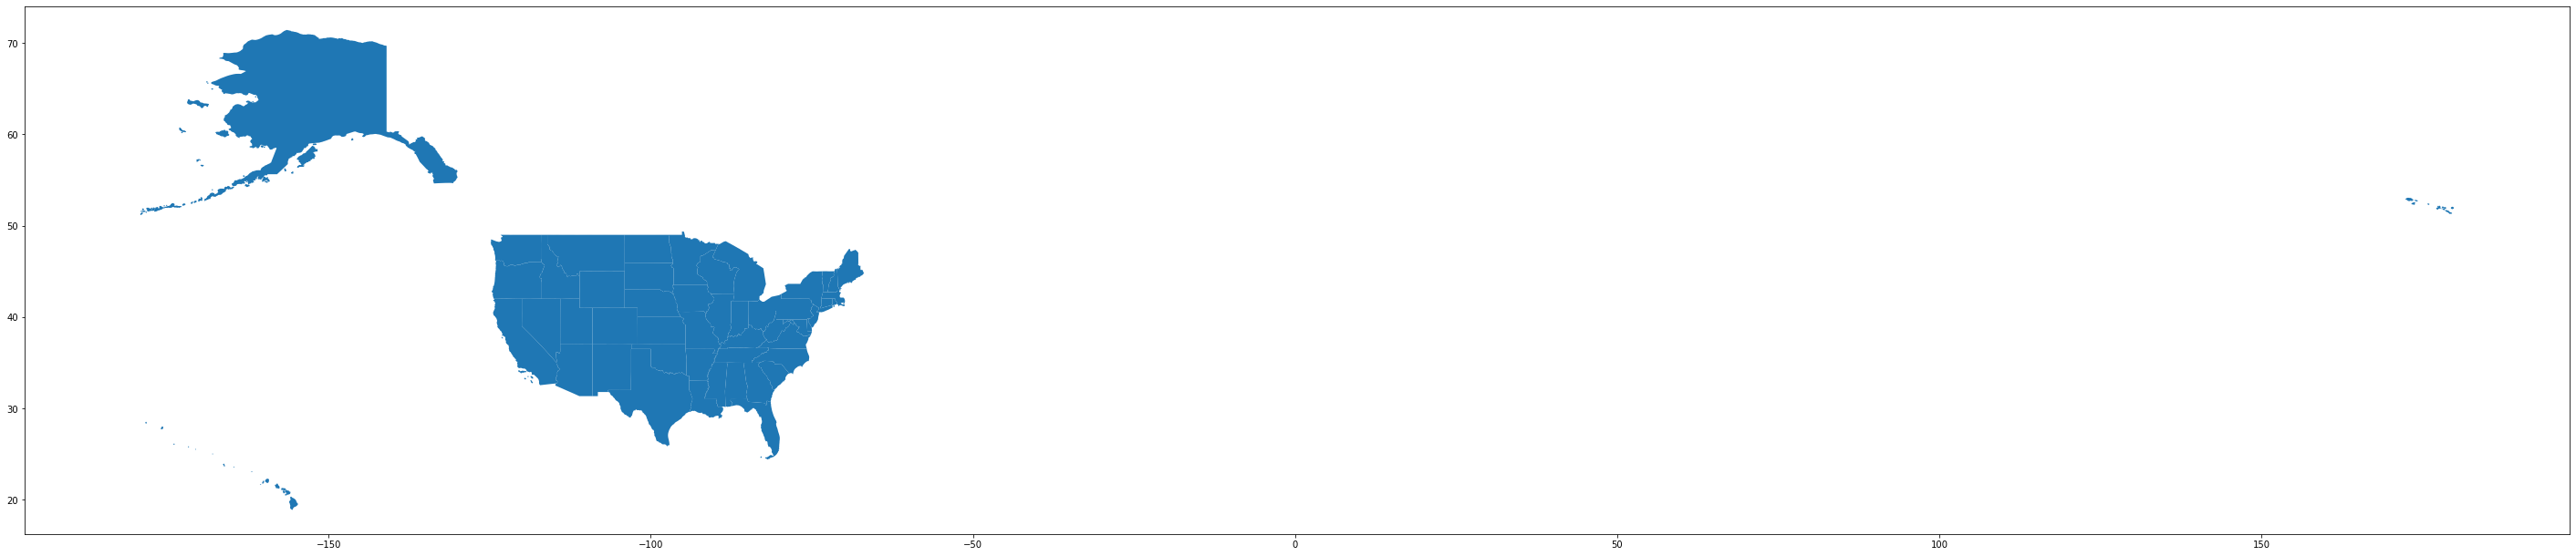

In [65]:
gdf.plot(figsize=(50,50))

When I run plot, it produces a map of the United States.

Then, I inspect the data types with the following command.

In [66]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             51 non-null     object  
 1   name              51 non-null     object  
 2   B05001001         51 non-null     float64 
 3   B05001001, Error  51 non-null     float64 
 4   B05001002         51 non-null     float64 
 5   B05001002, Error  51 non-null     float64 
 6   B05001003         51 non-null     float64 
 7   B05001003, Error  51 non-null     float64 
 8   B05001004         51 non-null     float64 
 9   B05001004, Error  51 non-null     float64 
 10  B05001005         51 non-null     float64 
 11  B05001005, Error  51 non-null     float64 
 12  B05001006         51 non-null     float64 
 13  B05001006, Error  51 non-null     float64 
 14  geometry          51 non-null     geometry
dtypes: float64(12), geometry(1), object(2)
memory usage: 6.1+ KB


This lets me know my data types and if I have any null data.

In [67]:
gdf.geoid.head()

0    04000US01
1    04000US02
2    04000US04
3    04000US05
4    04000US06
Name: geoid, dtype: object

## Trimming the Data
Because there's some data that I don't need, I can trim my data.

I want to drop certain columns, so I list existing columns as a list.

In [68]:
list(gdf)

['geoid',
 'name',
 'B05001001',
 'B05001001, Error',
 'B05001002',
 'B05001002, Error',
 'B05001003',
 'B05001003, Error',
 'B05001004',
 'B05001004, Error',
 'B05001005',
 'B05001005, Error',
 'B05001006',
 'B05001006, Error',
 'geometry']

Then, I trim the columns to the columns I want to keep.

In [69]:
columns_to_keep = ['geoid',
 'name',
 'B05001001',
 'B05001002',
 'B05001003',
 'B05001004',
 'B05001005',
 'B05001006',
 'geometry']

In [70]:
gdf = gdf[columns_to_keep]

In [71]:
gdf.head()

,geoid,name,B05001001,B05001002,B05001003,B05001004,B05001005,B05001006,geometry
0,04000US01,Alabama,4903185.0,4686864.0,8165.0,33204.0,76963.0,97989.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,731545.0,655014.0,3613.0,14540.0,37209.0,21169.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,7278717.0,6202093.0,11906.0,88417.0,439287.0,537014.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,3017804.0,2841613.0,3365.0,18540.0,57649.0,96637.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,39512223.0,28384990.0,80039.0,482974.0,5662600.0,4901620.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


## Renaming columns
Because my columns are coded, I want to rename them.

I first list out my columns.

In [72]:
list(gdf)

['geoid',
 'name',
 'B05001001',
 'B05001002',
 'B05001003',
 'B05001004',
 'B05001005',
 'B05001006',
 'geometry']

Then, I define the columns, replacing the output list above with my desired column names.

In [75]:
gdf.columns = ['geoid',
 'name',
 'Total',               
 'U.S. citizen, born in the United States',
 'U.S. citizen, born in Puerto Rico or U.S. Island A...',
 'U.S. citizen, born abroad of American parent(s)',
 'U.S. citizen by naturalization',
 'Not a U.S. citizen',
 'geometry']

In order to check if my columns have been renamed, I use the .head command.

In [76]:
gdf.head()

,geoid,name,Total,"U.S. citizen, born in the United States","U.S. citizen, born in Puerto Rico or U.S. Island A...","U.S. citizen, born abroad of American parent(s)",U.S. citizen by naturalization,Not a U.S. citizen,geometry
0,04000US01,Alabama,4903185.0,4686864.0,8165.0,33204.0,76963.0,97989.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,731545.0,655014.0,3613.0,14540.0,37209.0,21169.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,7278717.0,6202093.0,11906.0,88417.0,439287.0,537014.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,3017804.0,2841613.0,3365.0,18540.0,57649.0,96637.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,39512223.0,28384990.0,80039.0,482974.0,5662600.0,4901620.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


## Double Checking Data
I want to check if my data adds up.

In [77]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,"U.S. citizen, born in the United States","U.S. citizen, born in Puerto Rico or U.S. Island A...","U.S. citizen, born abroad of American parent(s)",U.S. citizen by naturalization,Not a U.S. citizen,geometry
27,04000US31,Nebraska,1934408.0,1775894.0,3092.0,12954.0,59681.0,82787.0,"MULTIPOLYGON (((-104.05264 42.00172, -104.0526..."


In [78]:
random_tract.iloc[0]['Total']

1934408.0

In [79]:
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 1934408.0


In [81]:
print(random_tract.iloc[0]['U.S. citizen, born in the United States'] + 
      random_tract.iloc[0]['U.S. citizen, born in Puerto Rico or U.S. Island A...'] + 
      random_tract.iloc[0]['U.S. citizen, born abroad of American parent(s)'] + 
      random_tract.iloc[0]['U.S. citizen by naturalization'] + 
      random_tract.iloc[0]['Not a U.S. citizen'])

1934408.0


## Normalizing data 
Because each state has different populations, I wanted to filter the data to be viewed in percentages so there are no misrepresentations.

I take the populations of the different U.S. citizens, add them together, and divide by the Total times 100 to get the percentage U.S. citizens. I take population of Not U.S. citizen divided by Total times 100 to get the percentage of Non U.S. citizen.

In [95]:
gdf['Percent U.S. citizen'] = (gdf['U.S. citizen, born in the United States'] + gdf['U.S. citizen, born in Puerto Rico or U.S. Island A...'] + gdf['U.S. citizen, born abroad of American parent(s)'] + gdf['U.S. citizen by naturalization']) /gdf['Total']*100
gdf['Percent Non U.S. citizen'] = gdf['Not a U.S. citizen']/gdf['Total']*100

Then I look at a sample of 5 to see if my percentages calculated correctly.

In [96]:
gdf.sample(5)

,geoid,name,Total,"U.S. citizen, born in the United States","U.S. citizen, born in Puerto Rico or U.S. Island A...","U.S. citizen, born abroad of American parent(s)",U.S. citizen by naturalization,Not a U.S. citizen,geometry,Percent U.S. citizen,Percent Non U.S. citizen
34,04000US38,North Dakota,762062.0,724343.0,1614.0,4967.0,11333.0,19805.0,"MULTIPOLYGON (((-104.04497 47.33014, -104.0449...",97.401130,2.598870
25,04000US29,Missouri,6137428.0,5824056.0,8163.0,43162.0,134410.0,127637.0,"MULTIPOLYGON (((-94.60803 38.84721, -94.60803 ...",97.920350,2.079650
11,04000US15,Hawaii,1415872.0,1094686.0,8823.0,39351.0,160962.0,112050.0,"MULTIPOLYGON (((-155.43286 20.14521, -155.4315...",92.086149,7.913851
9,04000US12,Florida,21477737.0,16112000.0,570298.0,269011.0,2597783.0,1928645.0,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",91.020260,8.979740
49,04000US55,Wisconsin,5822434.0,5473103.0,24981.0,30111.0,135228.0,159011.0,"MULTIPOLYGON (((-92.88707 45.64415, -92.88671 ...",97.268994,2.731006


## Charts and Maps

### Non-citizen Population Map

With the following command, I produce a map the shows the different population levels of non citizens in each state. However, this map is not very representative, as each state has a different population size.

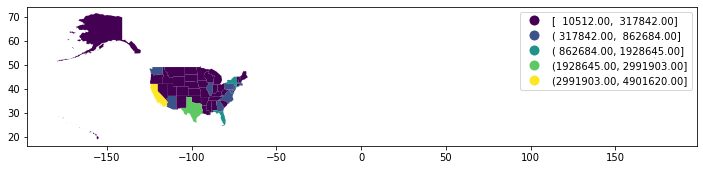

In [118]:
gdf.plot(figsize=(12,10),
                 column='Not a U.S. citizen',
                 legend=True, 
                 scheme='NaturalBreaks')

### Percentage Map

Thus, I produce a map utilizing the percentages of non citizens in each state, which more accurately shows which states have more non citizens.

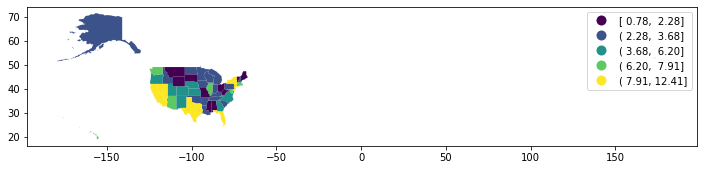

In [113]:
gdf.plot(figsize=(12,10),
                 column='Percent Non U.S. citizen',
                 legend=True, 
                 scheme='NaturalBreaks')

### Top 10 

I'm also curious which states are the top 10 with most non citizens, so I sort the states by highest percentage of non citizens and make a map out of that.

In [103]:
gdf_sorted = gdf.sort_values(by='Percent Non U.S. citizen',ascending = False)

In [109]:
gdf_sorted[['geoid', 'name', 'Percent Non U.S. citizen']].head(10)

,geoid,name,Percent Non U.S. citizen
4,04000US06,California,12.405326
43,04000US48,Texas,10.318372
28,04000US32,Nevada,9.784439
30,04000US34,New Jersey,9.712515
32,04000US36,New York,9.068422
9,04000US12,Florida,8.979740
11,04000US15,Hawaii,7.913851
47,04000US53,Washington,7.874017
21,04000US25,Massachusetts,7.814476
20,04000US24,Maryland,7.401417


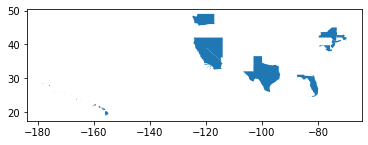

In [110]:
gdf_sorted.head(10).plot()

Here is the map of states with the most non citizens.